In [7]:
%run quantum.py

  1.0  0.0  0.0  0.0
  0.0  1.0  0.0  0.0
  0.0  0.0  1.0  0.0
  0.0  0.0  0.0 -1.0


C:\Users\jrnat\AppData\Local\Temp\ipykernel_18532\1610014059.py:24: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc,Aer.get_backend('unitary_simulator'))
c:\Users\jrnat\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


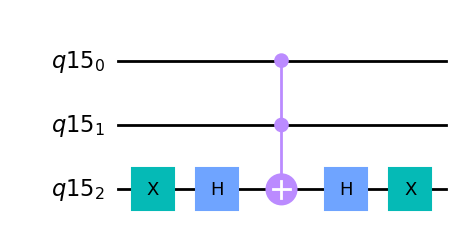

In [9]:
#Importing the dependencies
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, AerWrapper

#Defining the circuit
qreg = QuantumRegister(3)

qc = QuantumCircuit(qreg)

#Implementing the algortihm

#Setting ancilla
qc.x(qreg[2])
qc.h(qreg[2])


Uf(qc, qreg)


#Setting ancilla back
qc.h(qreg[2])
qc.x(qreg[2])

#Running the circuit 
job = execute(qc,Aer.get_backend('unitary_simulator'))
u = job.result().get_unitary(qc, decimals = 3).data

#We are interested in the top-left 4x4 part
for i in range(4):
    s=""
    for j in range(4):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)
    

qc.draw(output='mpl')






In [10]:
#Defining ancilla operator with additional qubits

def inversion(qc, qreg):

    #step - 1
    qc.h(qreg[1])
    qc.x(qreg[0])

    #step - 2
    qc.x(qreg[1])
    qc.x(qreg[0])

    #step - 3
    qc.ccx(qreg[1],qreg[0],qreg[2]) #basically the Uf

    #step - 4
    qc.x(qreg[1])
    qc.x(qreg[0])

    #step - 5
    qc.x(qreg[2])

    #step - 6 
    qc.h(qreg[1])
    qc.h(qreg[0])
    



-0.707  0.0 -0.00.707
0.707  0.0  0.00.707
 -0.00.707-0.707  0.0
  0.00.7070.707  0.0


C:\Users\jrnat\AppData\Local\Temp\ipykernel_18532\2322490633.py:21: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job  = execute(qc,Aer.get_backend('unitary_simulator'))
c:\Users\jrnat\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


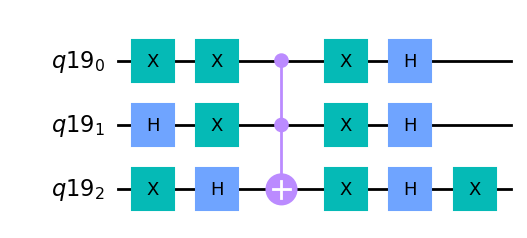

In [11]:
#Now we will implement the function of inversion here

#dependencies
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute

qreg =  QuantumRegister(3)
qc = QuantumCircuit(qreg)


#Setting the ancilla
qc.x(qreg[2])
qc.h(qreg[2])

inversion(qc, qreg)

#setting the ancilla back
qc.h(qreg[2])
qc.x(qreg[2])

#Running the circuit
job  = execute(qc,Aer.get_backend('unitary_simulator'))

u = job.result().get_unitary(qc,decimals = 3).data

for i in range(4):
    s=""
    for j in range(4):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)
    
qc.draw(output='mpl')


In [13]:
%run quantum.py

00 is observed 531 times
11 is observed 469 times


C:\Users\jrnat\AppData\Local\Temp\ipykernel_18532\1282798433.py:45: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc, Aer.get_backend('qasm_simulator'), shots = 1000)
c:\Users\jrnat\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


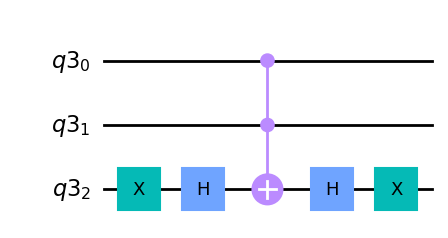

In [14]:
#Now we will be testing the Grover's search

#dependencies
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg = QuantumRegister(3)
creg = ClassicalRegister(2)
qc = QuantumCircuit(qreg, creg)

#Grover algorithm

#initial - equal superposition

for i in range(2):
    qc.h(qreg[i])

#setting ancilla
qc.x(qreg[2])
qc.h(qreg[2])

qc.barrier()

#Changing the number of iterations
iterations = 1

for i in range(iterations):
    
    #query
    Uf(qc,qreg)
    qc.barrier()
    inversion(qc,qreg)
    qc.barrier()

#Setting the ancilla back
qc.h(qreg[2])
qc.x(qreg[2])
qc.barrier()

#Measuring the circuit
qc.measure(qreg[0],creg[0])
qc.measure(qreg[1],creg[1])


#Running the circuit
job = execute(qc, Aer.get_backend('qasm_simulator'), shots = 1000)
counts = job.result().get_counts(qc)

# print the outcome
for outcome in counts:
    print(outcome,"is observed",counts[outcome],"times")

mycircuit.draw(output='mpl')